In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [62]:
import pandas as pd
df = pd.read_csv("nasa.csv")
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### 1. Explore dataset – correlation between features, their impact on target, independence assumptions.

In [63]:
#Name of features
df.columns


Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [64]:
#Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [65]:
#Removing object data types and unnecessary features (IDs)
df.drop(['Name', 'Neo Reference ID', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Orbit ID'], axis=1, inplace=True)

In [66]:
#Rename label "Hazardous" --> "Class"
df.rename(columns={'Hazardous': 'Class'}, inplace=True)

In [67]:
#Use 0 (true) or 1 (false) in "Class"
df['Class'].replace({True: 0, False: 1}, inplace=True)

C:\Users\corsi\AppData\Local\Temp\ipykernel_12692\1955632553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].replace({True: 0, False: 1}, inplace=True)
C:\Users\corsi\AppData\Local\Temp\ipykernel_12692\1955632553.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'].replace

In [68]:
#preview of records in the dataset
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Class
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0


In [69]:
#The method df.isna().sum() in Pandas is used to count the number of missing values (NaN) in a DataFrame
df.isna().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

In [70]:
#Count the number of entries for each class: 0 (true) or 1 (false)
df['Class'].value_counts()

Class
1    3932
0     755
Name: count, dtype: int64

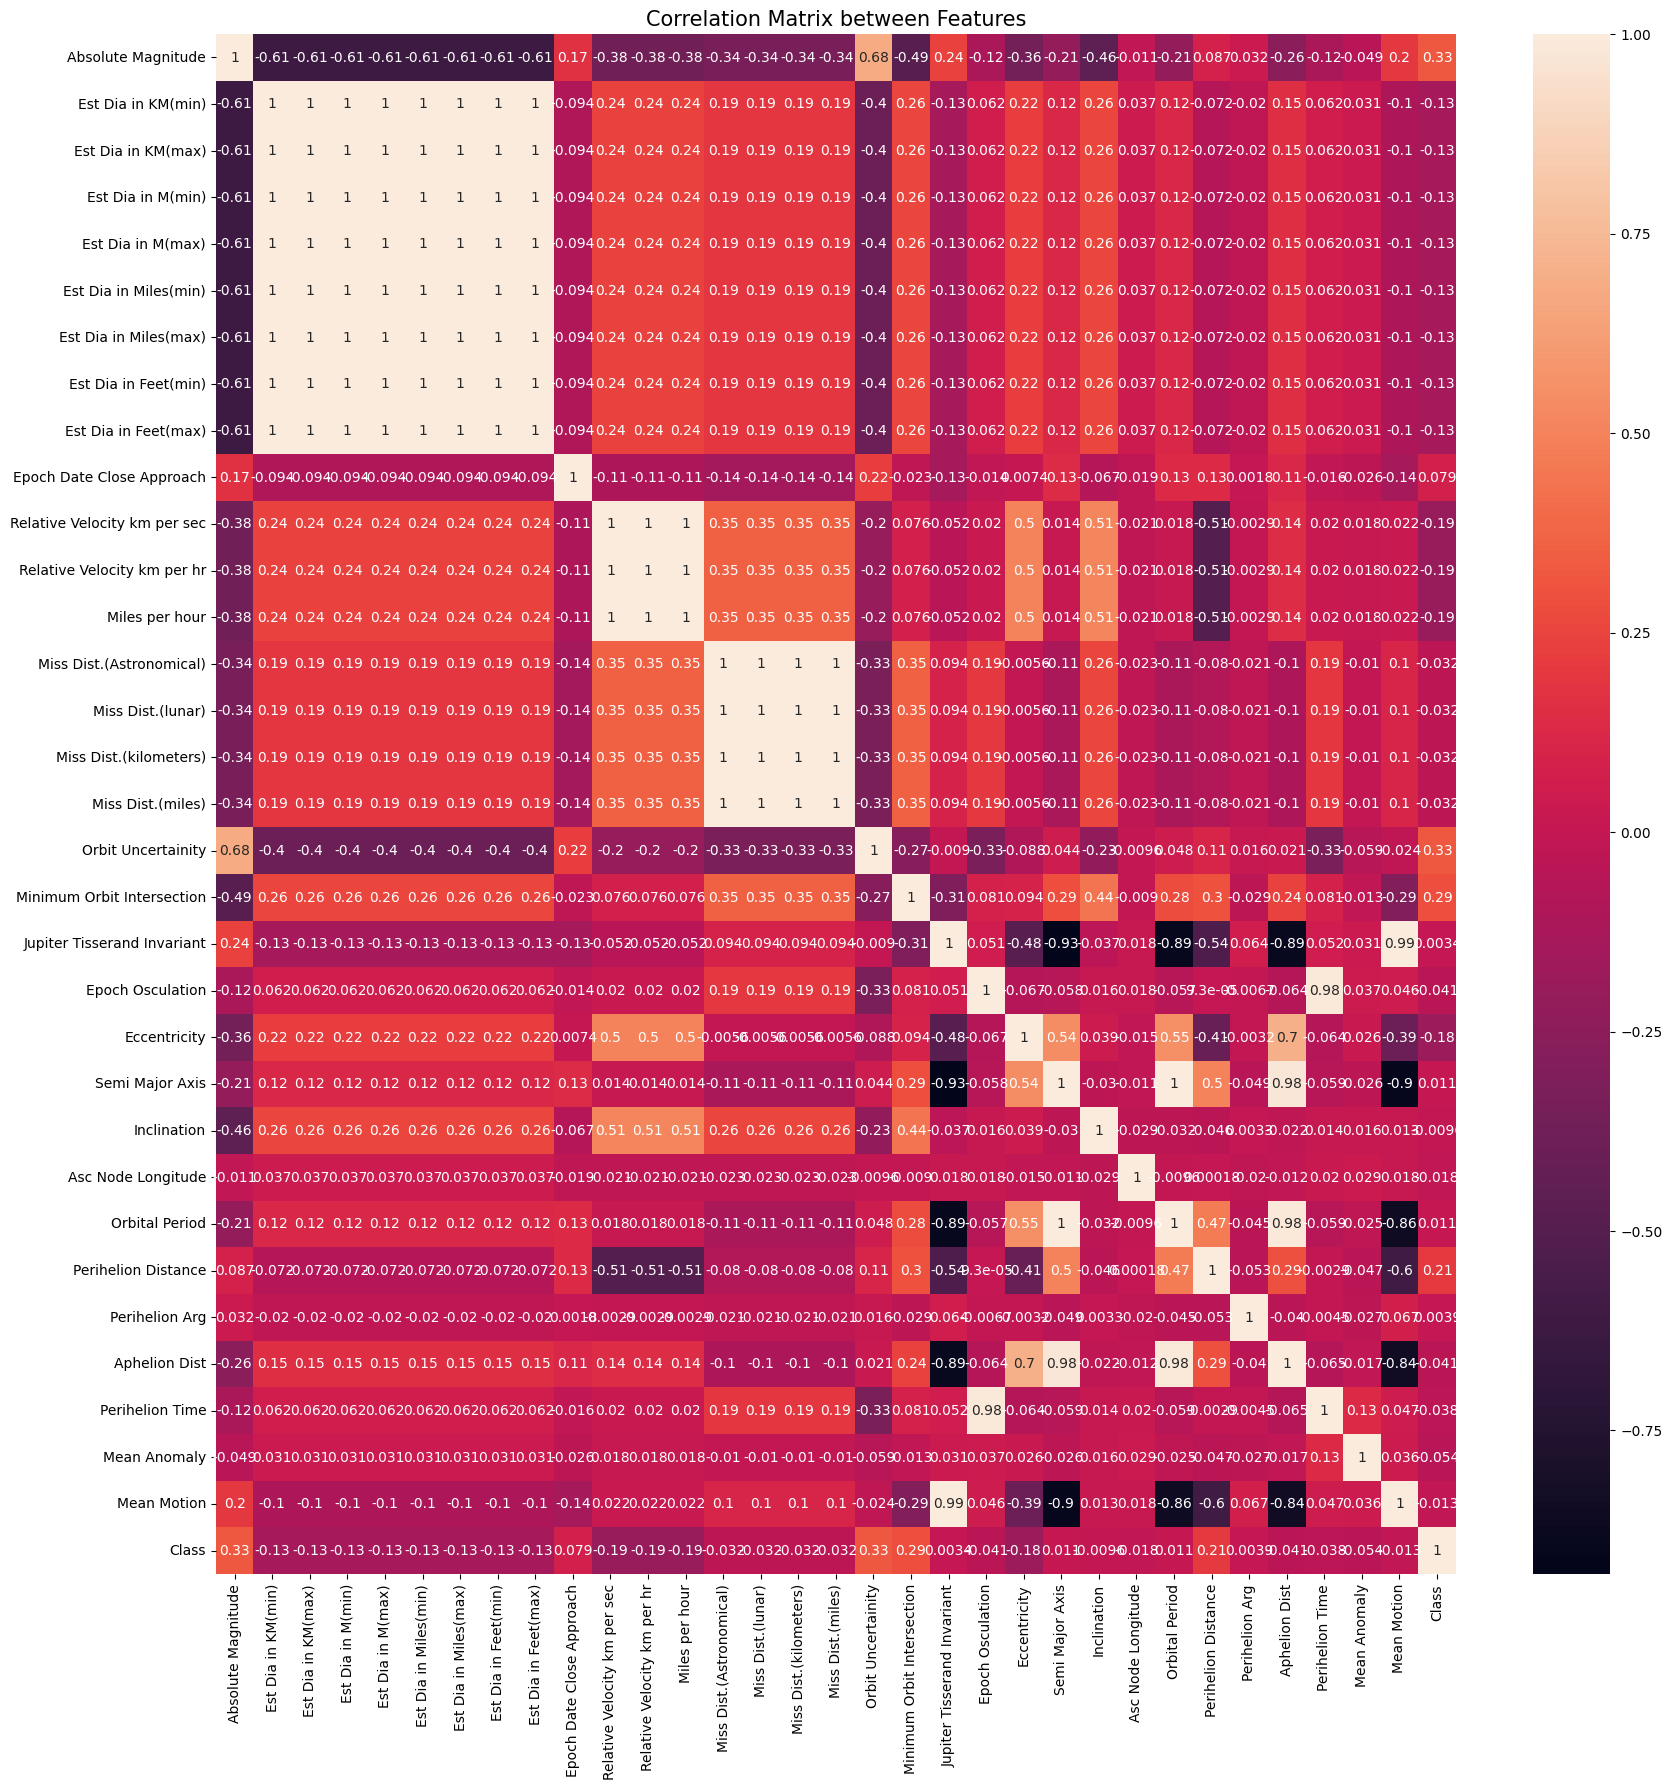

In [71]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Plot a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix between Features', size=15)
plt.show()

Many features are reduntant. For example: the diameter features come in different units, but only one is neccessary.

Therefore, we will only keep diameter in meters (column Est Dia in M), speed in km per hour.



In [72]:
c_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            col = correlation_matrix.columns[i]
            c_features.add(col)

for feature in c_features:
    print("The correlated feature {} is going to be eliminated".format(feature))
print('')

df.drop(labels=c_features, axis=1, inplace=True)

The correlated feature Miss Dist.(kilometers) is going to be eliminated
The correlated feature Est Dia in Miles(max) is going to be eliminated
The correlated feature Est Dia in KM(max) is going to be eliminated
The correlated feature Miss Dist.(lunar) is going to be eliminated
The correlated feature Est Dia in M(max) is going to be eliminated
The correlated feature Miss Dist.(miles) is going to be eliminated
The correlated feature Aphelion Dist is going to be eliminated
The correlated feature Miles per hour is going to be eliminated
The correlated feature Perihelion Time is going to be eliminated
The correlated feature Orbital Period is going to be eliminated
The correlated feature Est Dia in Miles(min) is going to be eliminated
The correlated feature Est Dia in M(min) is going to be eliminated
The correlated feature Est Dia in Feet(min) is going to be eliminated
The correlated feature Est Dia in Feet(max) is going to be eliminated
The correlated feature Mean Motion is going to be elim

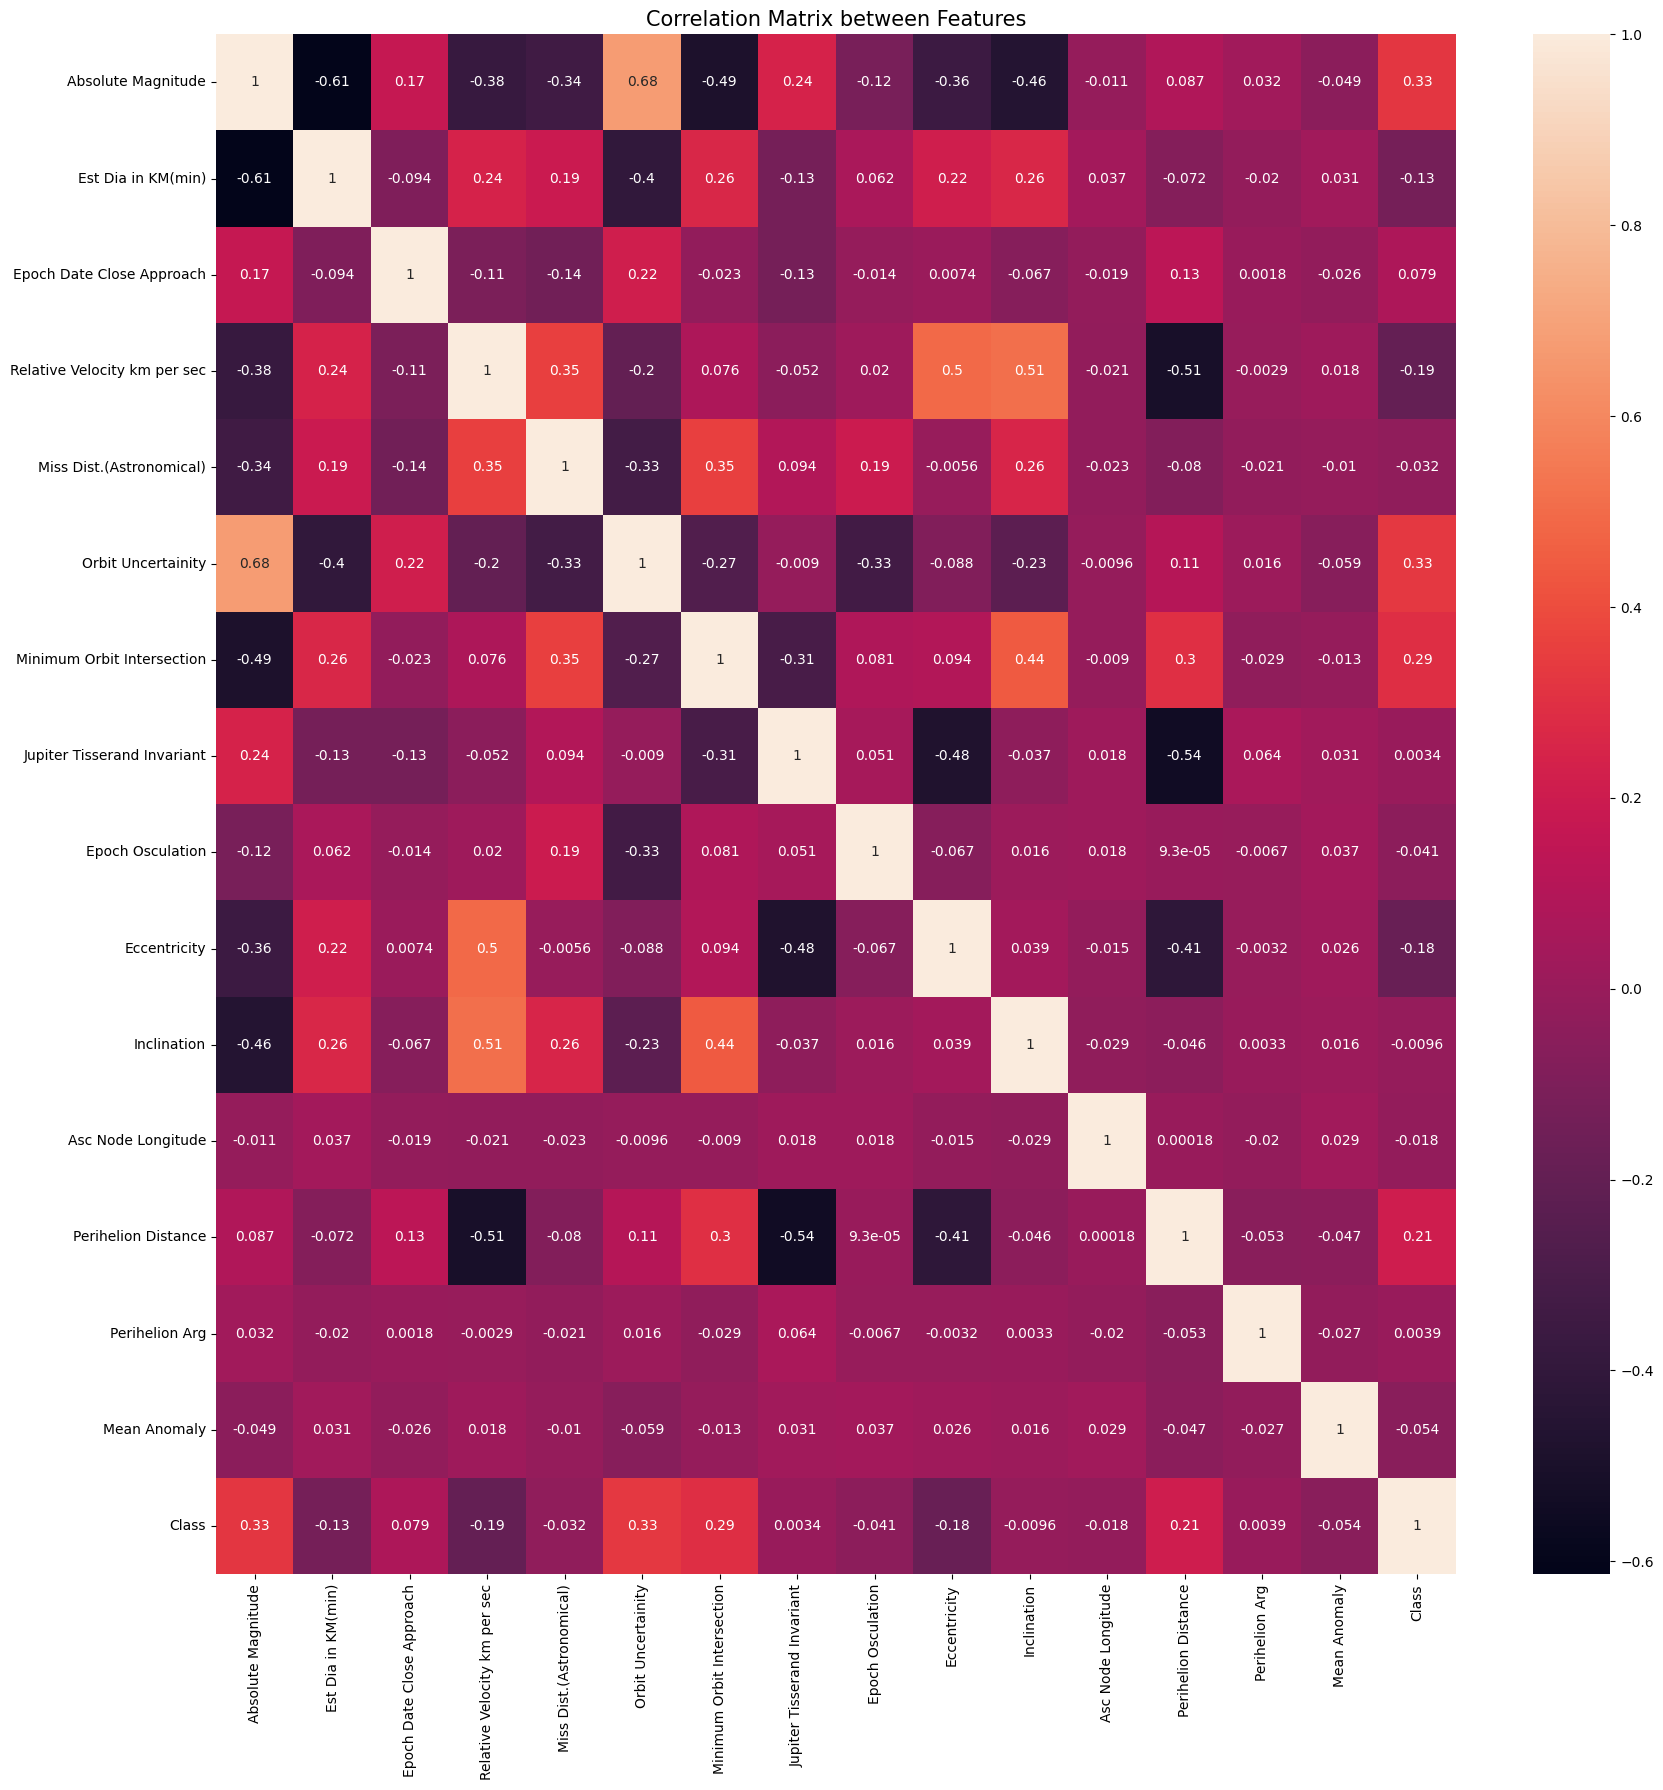

In [73]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Plot a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix between Features', size=15)
plt.show()

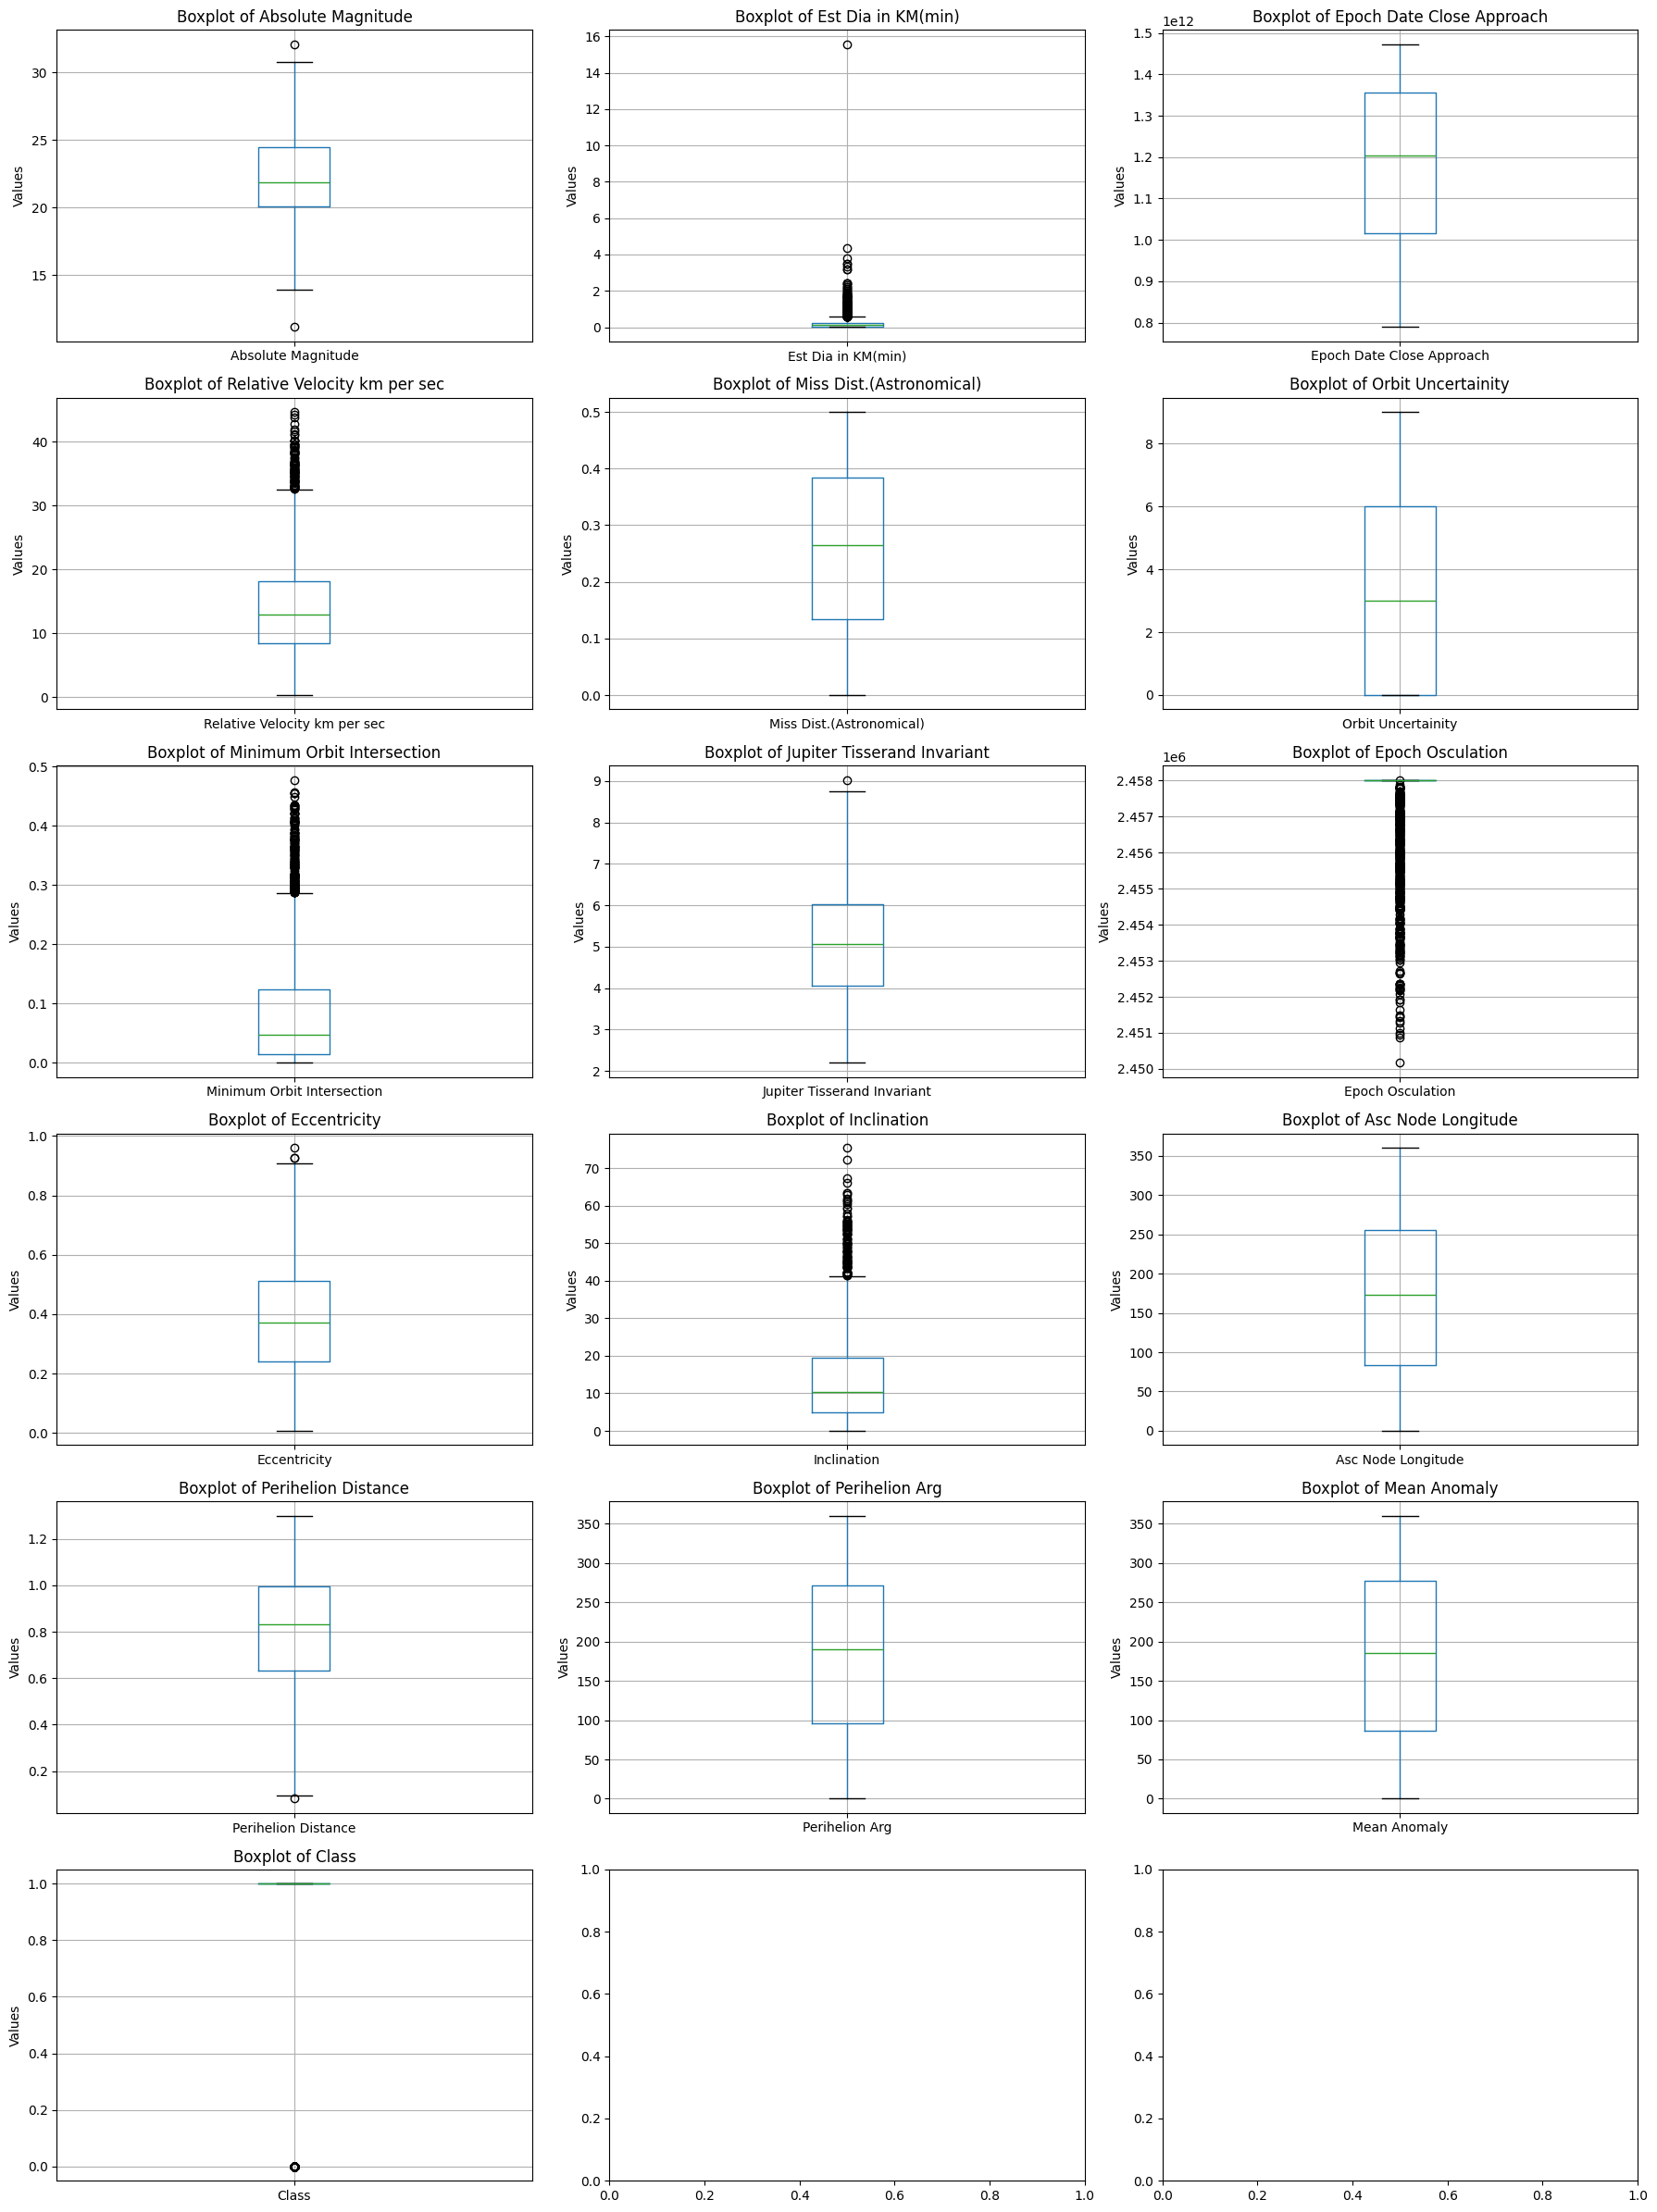

In [74]:
# Get the list of features (columns) in the DataFrame
features = df.columns

# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_rows = (num_features + 2) // 3  # Round up to the nearest integer
num_cols = min(num_features, 3)

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten the axes array if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Create a separate boxplot for each feature
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    df[[feature]].boxplot(ax=axes[row, col])

    # Set title and labels
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 2.Try multiple visualization strategies: correlation plots, dimensionality reduction approaches – PCA, UMAP, tSNE. Explain gained insights.


#### Data normalization

In [75]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

# Standardize the data (excluding the class column)
features = df.drop(columns='Class')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Recombine with the class column
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Class'] = df['Class']

#### Dimensionality reduction: removing features with low variance: 

In [76]:
# 2. Dimensionality reduction by variance
# Remove features with low variance (threshold: 0.01)
selector = VarianceThreshold(threshold=0.01)
reduced_features_var = selector.fit_transform(df_scaled.drop(columns='Class'))
# Determine retained columns
selected_columns = df_scaled.drop(columns='Class').columns[selector.get_support()]

# Create DataFrame with the selected columns
df_reduced_var = pd.DataFrame(reduced_features_var, columns=selected_columns)
df_reduced_var['Class'] = df_scaled['Class'].values

#### Searching most important features:

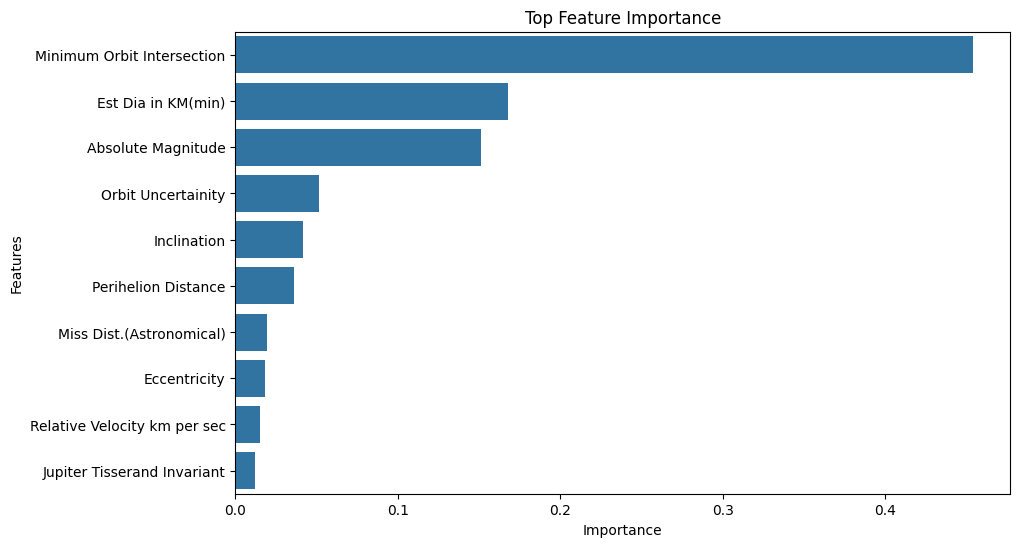

In [77]:
# 3. Feature selection using Random Forest importance
# Train the model to obtain the top important features
forest = RandomForestClassifier(random_state=42)
forest.fit(df_reduced_var.drop(columns='Class'), df_reduced_var['Class'])

# Obtain the most important features
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_rf = [df_reduced_var.columns[i] for i in indices[:10]]  # Selecting the top 10 features

# Create the final reduced dataset with the most important features
df_final_reduced = df_reduced_var[selected_features_rf + ['Class']]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=[df_reduced_var.columns[i] for i in indices[:10]])
plt.title("Top Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#### Correlation plots

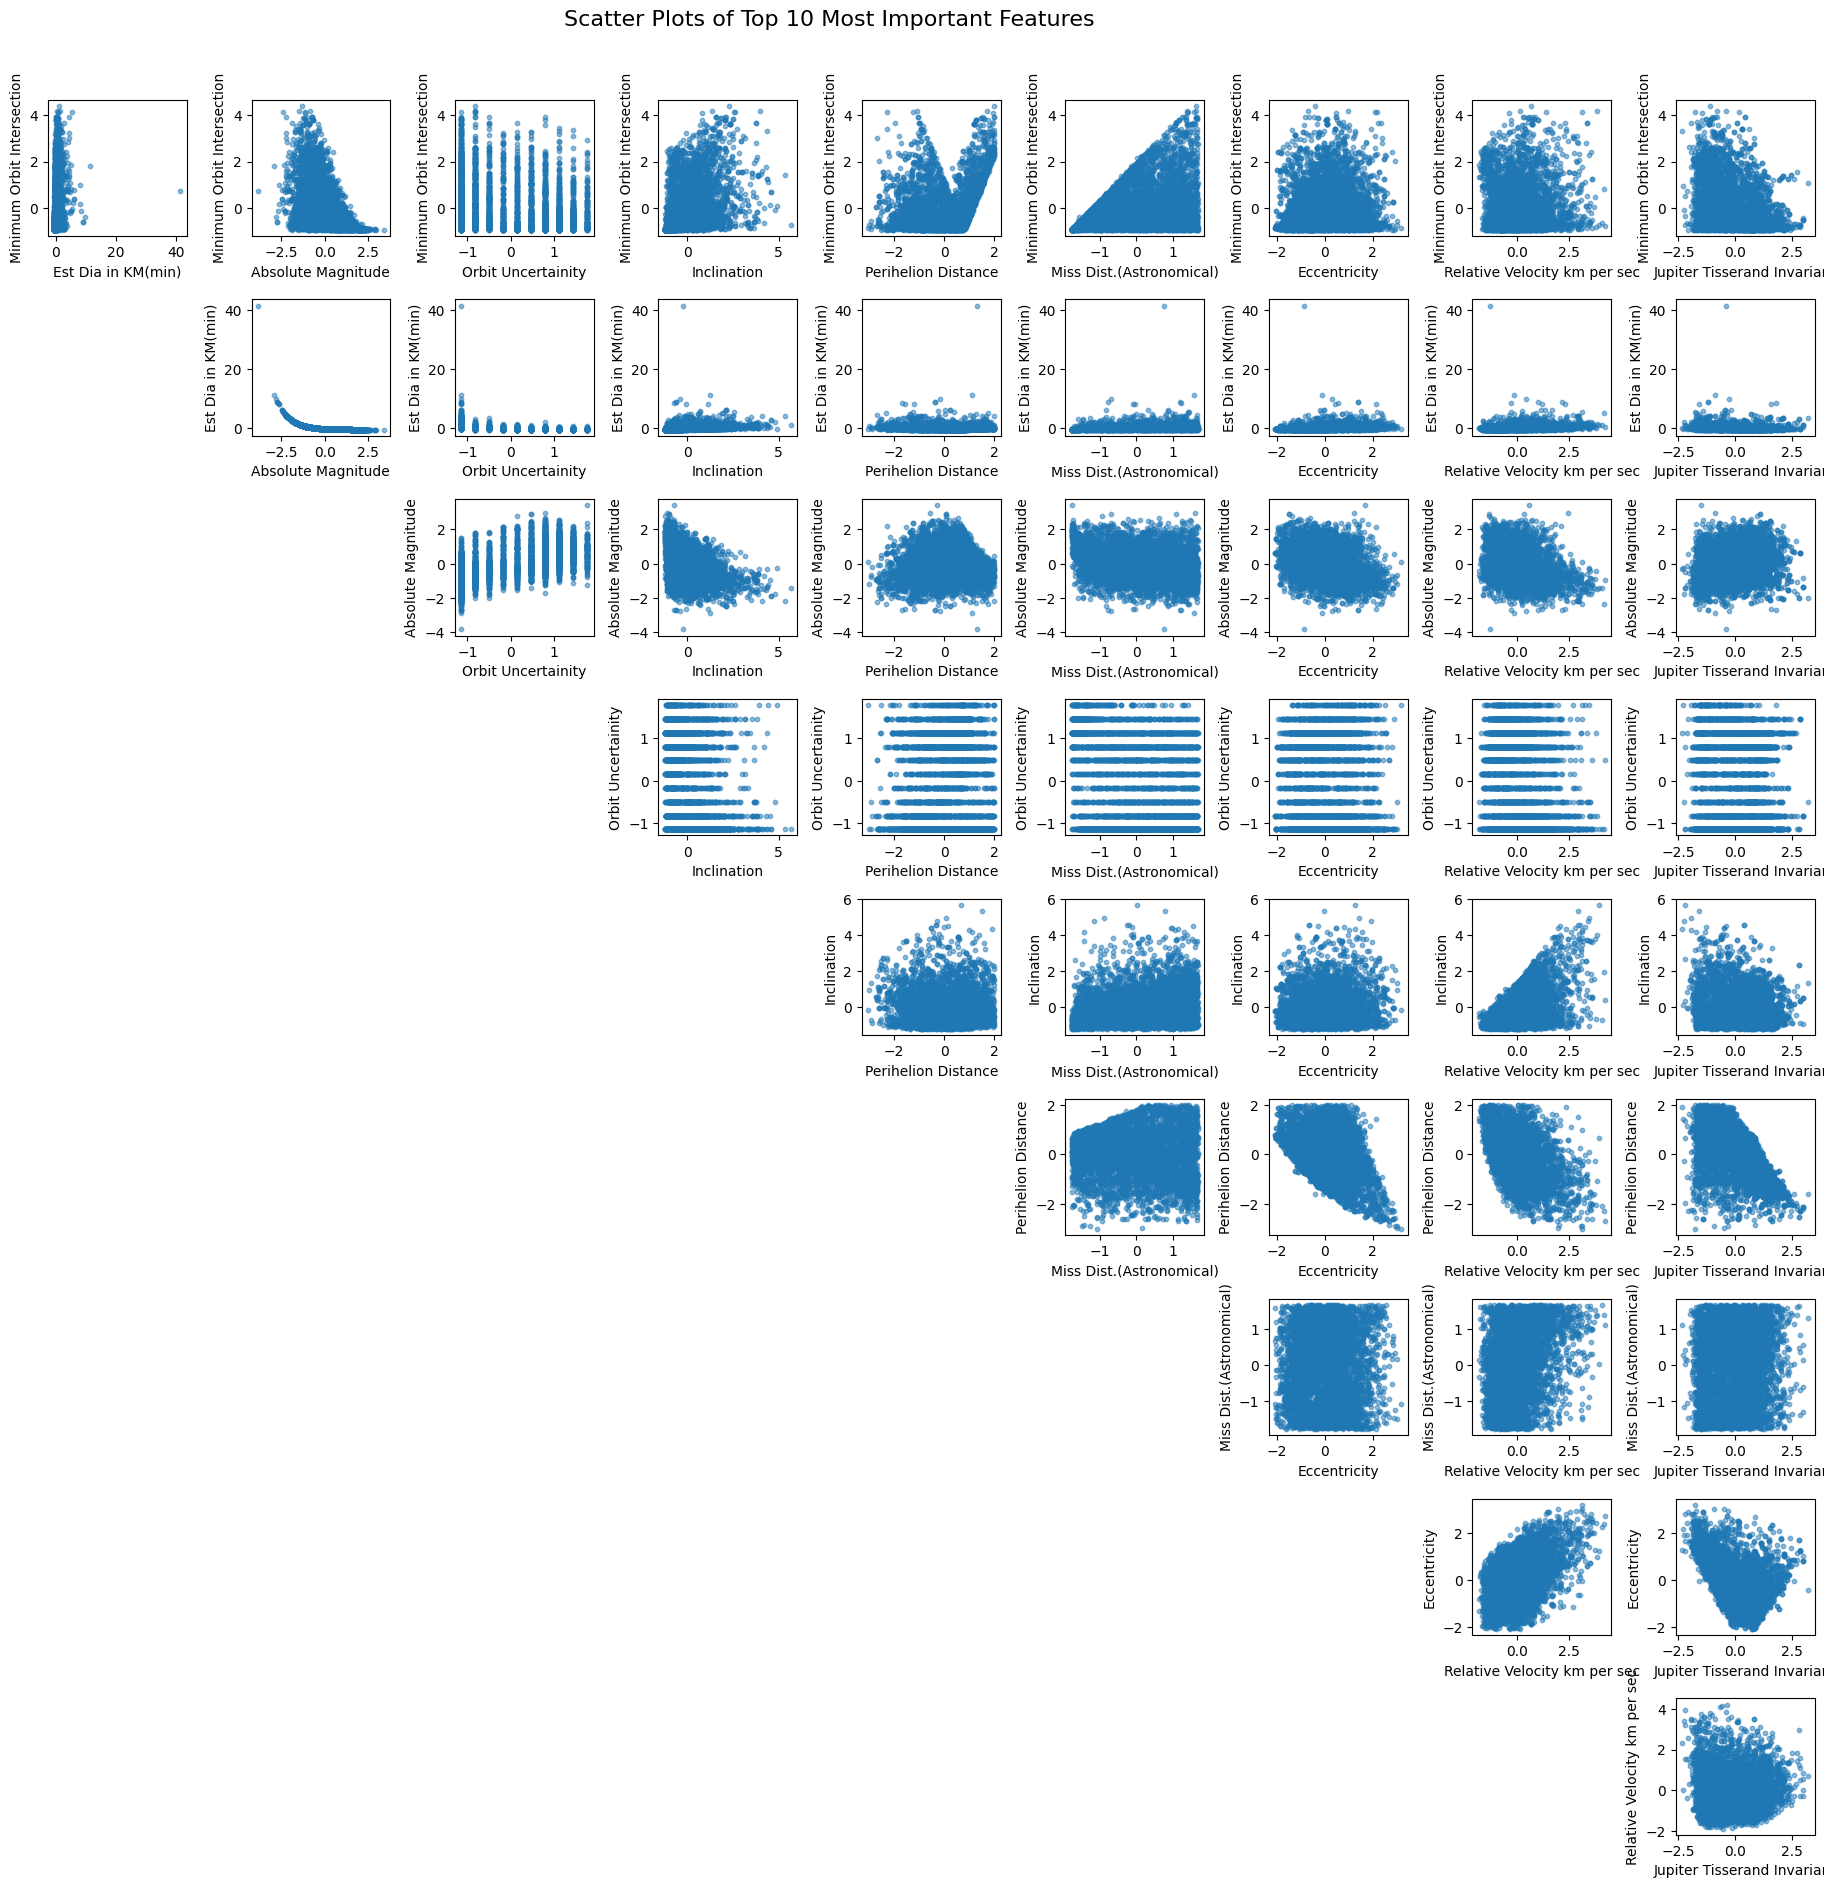

In [81]:
# Creating scatter plots for each pair of the top 10 most important features
import itertools

# Setting up the plot grid for pairwise scatter plots
top_features = df_final_reduced.drop(columns='Class')
num_features = len(top_features.columns)
fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

# Generate scatter plots for each pair of features
for i, j in itertools.combinations(range(num_features), 2):
    # Scatter plot in the upper triangle
    axes[i, j].scatter(top_features.iloc[:, j], top_features.iloc[:, i], alpha=0.5, s=10)
    axes[i, j].set_xlabel(top_features.columns[j])
    axes[i, j].set_ylabel(top_features.columns[i])
    
# Hide unused subplots
for ax in itertools.chain(*axes):
    if not ax.has_data():
        ax.set_visible(False)

plt.suptitle("Scatter Plots of Top 10 Most Important Features", y=1.02, size=16)
plt.tight_layout()
plt.show()

#### PCA Analysis

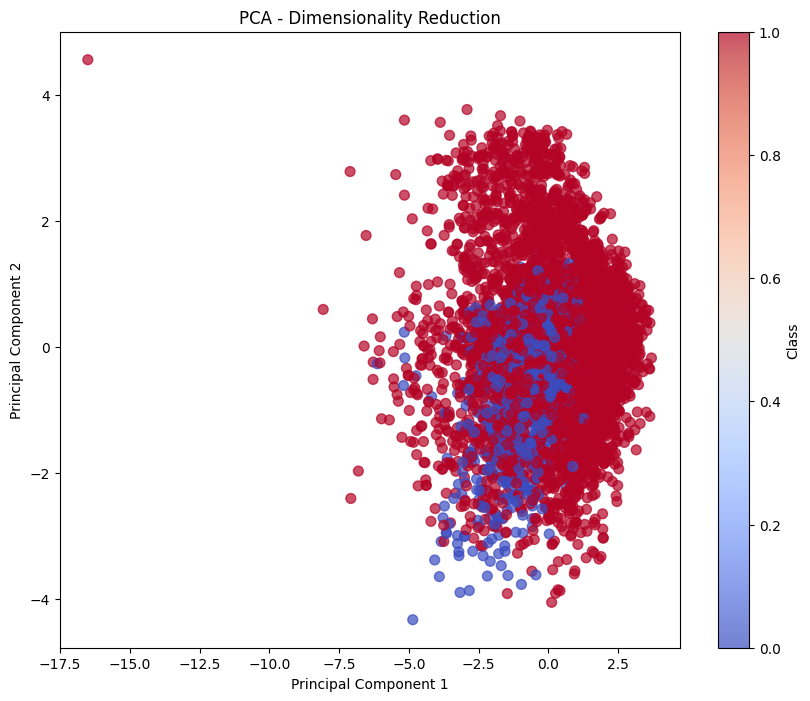

In [82]:
# PCA Visualization with reduced data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_final_reduced.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_final_reduced['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### T-SNE Analysis:

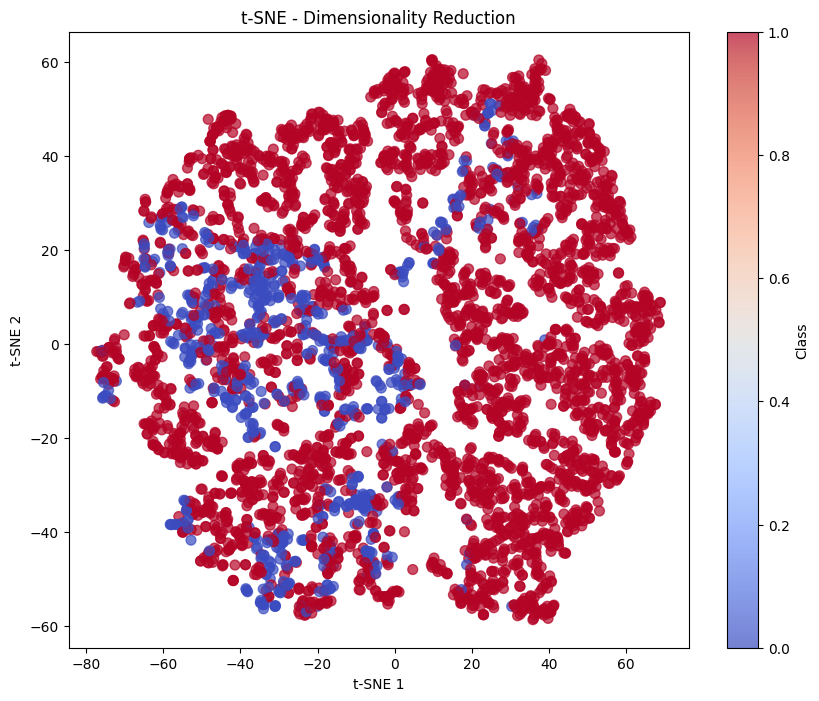

In [83]:
# t-SNE Visualization with reduced data
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_result = tsne.fit_transform(df_final_reduced.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_final_reduced['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('t-SNE - Dimensionality Reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

#### UMAP Analysis:

C:\Users\corsi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


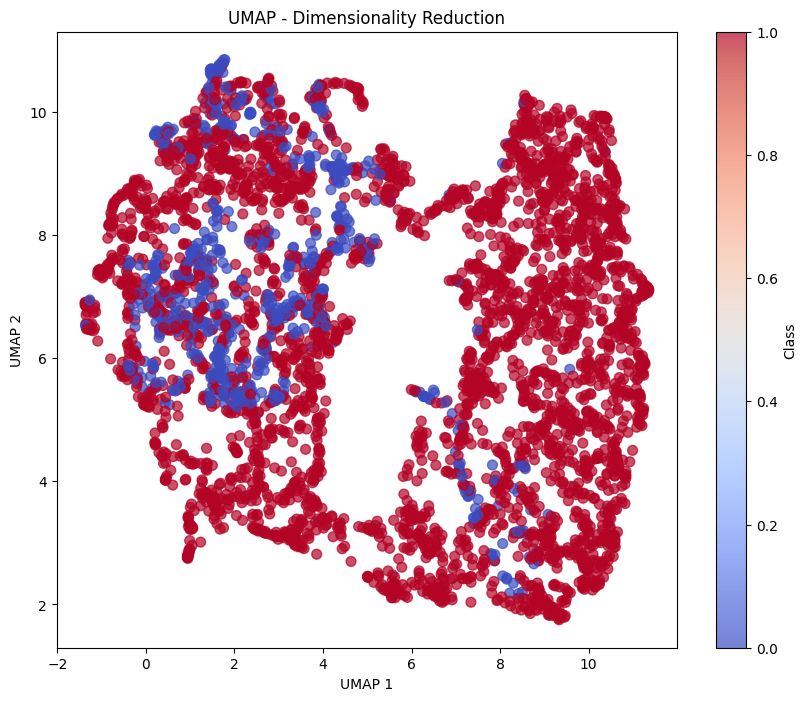

In [84]:
# UMAP Visualization with reduced data
umap_model = umap.UMAP(n_components=2, random_state=0)
umap_result = umap_model.fit_transform(df_final_reduced.drop(columns='Class'))
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df_final_reduced['Class'], cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Class')
plt.title('UMAP - Dimensionality Reduction')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

### 3.Explore data using unsupervised learning techniques.


### 4.Identify appropriate cross-validation strategy.



### 5.Train a simple model first. Use validation set for hyperparameter tuning and/or early stopping. Analyze its performance using cross-validation. Identify potential pitfalls.

### 6.Propose ways to improve performance – e.g., feature selection, regularization, increasing model complexity. Conduct at least 2 more experiments.